<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulacion-1/blob/main/Metodo_Aceptacion_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DE ACEPTACIÓN Y RECHAZO

Se tiene la función $\dfrac{e^x}{e-1}$ con $0 \leq x \leq 1$ , primero debe mostrarse que es una fdp:

*   $e^x\geq 0$ para todo $x\in \mathbb{R}$ y $e-1$ es una constante $>0$
*   $\int_0^1 \frac{e^x}{e-1}=1$

Ahora, al ser $f(x)$ una función monotona creciente, sabemos que está acotada por $g(x)=\dfrac{e}{e-1}$ , en este método se busca encontrar una función $g(x)$ y una constante $c$ tal que se satisfaga la relación:
$$\dfrac{f(x)}{g(x)} \leq c$$
por lo tanto , tomando $g(x)=\frac{e}{e-1}$ , se tiene que

$$ \dfrac{f(x)}{g(x)} \leq c \hspace{3mm} \Rightarrow \hspace{3mm} \dfrac{\frac{e}{e-1}}{\frac{e}{e-1}} \leq c  \hspace{3mm} \Rightarrow  \hspace{3mm} c=1$$

Sin embargo, $g(x)=\frac{e}{e-1}$ **NO ES una fdp** pues no cumple las condiciones, por lo tanto, el valor calculado de $c$ en realidad corresponde a $g(x)$, es decir $g(x)=1$.

Para calcular entonces a $c$. se retoma la desigualdad anterior:

$$\dfrac{f(x)}{g(x)} \leq c \hspace{3mm} \Rightarrow \hspace{3mm} \dfrac{\frac{e}{e-1}}{1} \leq c \hspace{3mm} \Rightarrow \hspace{3mm} c=\frac{e}{e-1} $$





Finalmente, se genear dos variables aleatorias con distribución $u_1,u_2\sim U(0,1)$ y las se guardaran las variables $u_2$ siempre que se cumpla la condición:
$$u_2 \leq  \dfrac{f(u_1)}{cg(u_1)}$$

# SIMULACIÓN

In [1]:
#Se cargan las librerías
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def fun1(N):
  f=np.exp(N)/(np.exp(1)-1)
  return f

In [23]:
def Acep_Rech(n):          #Esta función devuelve una lista con las variables aleatorias
  lista=[]                    #   que siguen la distribución f(x)
  c=np.exp(1)/(np.exp(1)-1)
  for i in range(n):
    u1=rnd.random()            # Primer variable aleatoria u ~ U(0,1)
    u2=rnd.random()     # Segunda variable aleatoria u ~ U(0,0.5)
    if u1 <=fun1(u2)/c:              # El condicional determina que F^-1(u2) se calcula
      x=u2
    lista.append(x)           #Se guardan los valores de X ~ f(x)
  return lista

(array([ 639.,  530.,  634.,  617.,  558.,  600.,  582.,  607.,  686.,
         628.,  680.,  641.,  664.,  643.,  670.,  665.,  626.,  643.,
         738.,  705.,  754.,  732.,  733.,  738.,  695.,  809.,  813.,
         706.,  834.,  838.,  816.,  830.,  817.,  848.,  741.,  852.,
         833.,  848.,  864.,  869.,  806.,  933.,  869.,  886.,  921.,
         950.,  995.,  956.,  917.,  914.,  907.,  906., 1007.,  984.,
        1010., 1091., 1022., 1014.,  992., 1040., 1030., 1096., 1062.,
        1095., 1070., 1119., 1131., 1170., 1138., 1179., 1205., 1149.,
        1194., 1234., 1252., 1255., 1244., 1269., 1308., 1299., 1323.,
        1302., 1346., 1415., 1281., 1391., 1352., 1409., 1417., 1467.,
        1341., 1466., 1412., 1494., 1529., 1502., 1572., 1550., 1579.,
        1507.]),
 array([5.17847398e-05, 1.00508245e-02, 2.00498643e-02, 3.00489040e-02,
        4.00479438e-02, 5.00469835e-02, 6.00460233e-02, 7.00450630e-02,
        8.00441028e-02, 9.00431425e-02, 1.00042182e-01, 1.

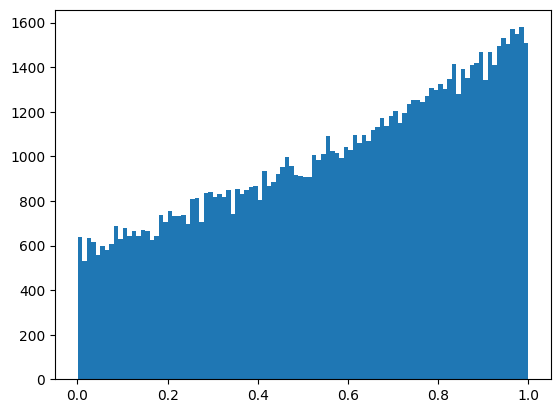

In [27]:
e=Acep_Rech(100000)           #Se calculan n varibles con distribución f(x)
plt.hist(e, bins=100)          #Imprime histograma

In [30]:
def acumulativa (muestra):        #Esta función devuelve las coordenadas para graficar F^-1 (x)
  n=len(muestra)
  x=np.sort(muestra)
  y=np.arange(0,n)/n
  return x,y

Text(0, 0.5, 'F(x)')

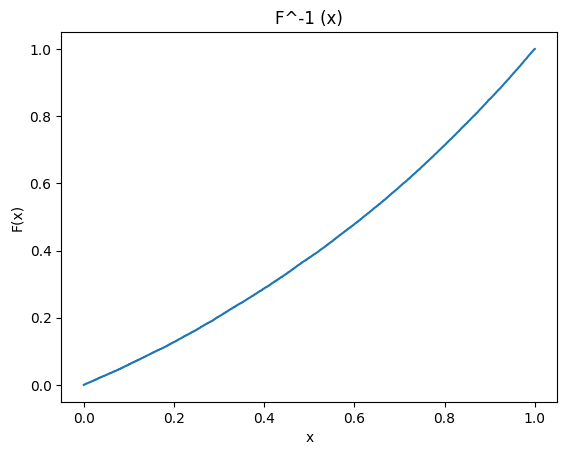

In [31]:
X,Y=acumulativa(e)                #Se imprime F^-1{x}
plt.step(X,Y)
plt.title('F^-1 (x)')
plt.xlabel("x")
plt.ylabel("F(x)")